# MNIST Database - Classification
# Using Convolution and Pooling Methods

### MNIST is a popular dataset of 60,000 training and 10,000 testing images of 28*28 pixel each represeting a digit from 0 to 9

#### The following code trains itself on the 60,000 training data and then predicts what digits are shown in the 10,000 testing images

##### The following are the steps taken:
- Define device to use GPU or CPU
- Downlaod MNIST data
- import data using DataLoader, Transformation
- Define Multilayer Neural Net and Activation Function
- Define Loss and Optimizer
- Define Training Loop (batch training)
- Evaluating model on testing data




In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
#Device Config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyper parameters
input_size = 28*28  #because you will see down the line that our images have the size 28X28
hidden_size = 100
num_classes = 10 #becasue our model need to recognize digits from 0 to 9 adding up to 10 classes
num_epochs = 2
batch_size = 100
learning_rate = 0.001

#Let's import the famous MNIST data
#torchvision.transforms.ToTensor --> Convert a PIL Image or numpy.ndarray to tensor
train_dataset = torchvision.datasets.MNIST(root = './data',train = True, transform = transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.MNIST(root = './data',train = False, transform = transforms.ToTensor())

#You can run DataLoader with no batch_size attribute and then use len() function to see the number of samples. Then decide...
#...on what batch size you want to use.
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

#Let's have a look at one batch of this data - keep in mind that dataloader provides an iterable over the given dataset
# Therefore, let's convert it to iter object
# examples = iter(train_loader)
# samples, labels = examples.next()
# print(samples.shape, '##notice that sample has 4 dimensions. It is basically a 10x1 matrix of 28x28 pics')
# print(labels.shape)
# print('length of train_loader = ', len(train_loader))
# print('\n','**MNIST train dataset number = length of train_loader X batch size = 600 X 100 = 60,000')

# #Let's show the image
# for i in range(6):
#     plt.subplot(2,3,i+1)
#     plt.imshow(samples[i][0],cmap = 'gray')

# plt.show

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'

Sample 0:
torch.Size([100, 1, 28, 28])
torch.Size([100])
tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

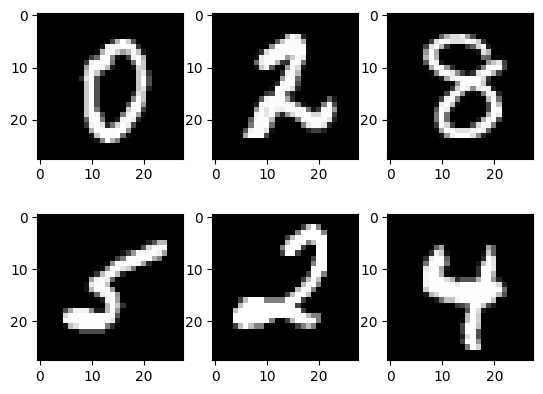

In [5]:
for i, (samples, labels) in enumerate(train_loader):
    print(f"Sample {i}:")
    print(samples.shape)
    print(labels.shape)
    # label_pred = model(samples)
    # print(label_pred.shape)|
    for j in range(6):
        plt.subplot(2,3,j+1)
        plt.imshow(samples[j][0],cmap = 'gray')
    print(samples[0][0])
    break

In [6]:
#Creating Forward Model
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
        self.map = nn.MaxPool2d(2)
        
        self.fc = nn.Linear(320,10)
    
    def forward(self,x):
        in_size = x.size(0)
        x = F.relu(self.map(self.conv1(x)))
        x = F.relu(self.map(self.conv2(x)))
        x = x.view(in_size,-1) #flatten the tensor
        
        x = self.fc(x)
        
        return F.log_softmax(x)

model = NeuralNet()

for i, (samples, labels) in enumerate(train_loader):
    print(f"Sample {i}:")
    print(samples.shape)
    print(samples.dtype)
    print(labels.shape)
    label_pred = model(samples)
    print(label_pred.shape)
    break

Sample 0:
torch.Size([100, 1, 28, 28])
torch.float32
torch.Size([100])
torch.Size([100, 10])


C:\Users\arefv\AppData\Local\Temp\ipykernel_60772\929148564.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


## Second Approach: torch.utils.data.TensorDataset

In [ ]:
train_data_path = "./train_data_test.pt"
# test_data_path = "./test_data.pt"
torch.save({"data": train_dataset.data, "targets": train_dataset.targets}, train_data_path)
# torch.save({"data": test_dataset.data, "targets": test_dataset.targets}, test_data_path)


In [ ]:
# train_data = torch.load("./train_data_test.pt")
# train_dataset_recreate = torch.utils.data.TensorDataset(train_data["data"], train_data["targets"])
# train_loader_alternative = torch.utils.data.DataLoader(dataset=train_dataset_recreate, batch_size=100, shuffle=True)

C:\Users\arefv\AppData\Local\Temp\ipykernel_56584\929521103.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_data = torch.load("./train_data_test.pt")


In [ ]:
# len(train_loader_alternative)

600

In [ ]:
# #Creating Forward Model
# class NeuralNet_Alternative(nn.Module):
#     def __init__(self):
#         super(NeuralNet_Alternative, self).__init__()
#         self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
#         self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
#         self.map = nn.MaxPool2d(2)
        
#         self.fc = nn.Linear(320,10)
    
#     def forward(self,x):
#         in_size = x.size(0)
#         x = F.relu(self.map(self.conv1(x)))
#         x = F.relu(self.map(self.conv2(x)))
#         x = x.view(in_size,-1) #flatten the tensor
        
#         x = self.fc(x)
        
#         return F.log_softmax(x)

# model_Alternative = NeuralNet_Alternative()

In [14]:
# for i, (samples, labels) in enumerate(train_loader_alternative):
#     print(f"Sample {i}:")
#     print(samples.shape)
#     print(samples.dtype)
#     samples = samples.float()
#     print(samples.dtype)
#     samples = torch.unsqueeze(samples, 1) # Since the Input should be in the form of N (Batch Size) X C (Channel=1 for Black and White Images) X H (Image Height) X W (Image Width)
#     print(samples.shape)
#     print(labels.shape)
#     label_pred = model_Alternative(samples)
#     print(label_pred.shape)
#     break

#### Let's set up a fully connectd neural network with One hidden layer

In [16]:
#Creating Forward Model
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
        self.map = nn.MaxPool2d(2)
        
        self.fc = nn.Linear(320,10)
    
    def forward(self,x):
        in_size = x.size(0)
        x = F.relu(self.map(self.conv1(x)))
        x = F.relu(self.map(self.conv2(x)))
        x = x.view(in_size,-1) #flatten the tensor
        
        x = self.fc(x)
        
        return F.log_softmax(x)

model = NeuralNet()

#Loss Definition. We are going to use Cross Entropy Loss which will include Softmax activation function to output possibilities
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)

batch_num = len(train_loader)

for epoch in range(num_epochs):
    for i, (samples, labels) in enumerate(train_loader):
        
        #Let's reshape samples from 4 dimension to 2 dim, each row having 28*28 elements for each image
        #samples = samples.reshape(-1,28*28).to(device)
        
        #Forward pass
        label_pred = model(samples)
        # print(label_pred.shape)
        # break
        #Loss
        Loss = criterion(label_pred, labels)
        
        #Zero grads
        optimizer.zero_grad()
        
        #backward
        Loss.backward()
        
        #updating parameters
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print("epoch = {} / {} , Batch number = {} / {}  :  Loss = {Lossvalue:.4f}".format(epoch+1,num_epochs,i+1,batch_num,Lossvalue = Loss.item()))



C:\Users\arefv\AppData\Local\Temp\ipykernel_60772\3142893290.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


epoch = 1 / 2 , Batch number = 100 / 600  :  Loss = 0.4658
epoch = 1 / 2 , Batch number = 200 / 600  :  Loss = 0.3431
epoch = 1 / 2 , Batch number = 300 / 600  :  Loss = 0.2586
epoch = 1 / 2 , Batch number = 400 / 600  :  Loss = 0.2128
epoch = 1 / 2 , Batch number = 500 / 600  :  Loss = 0.1251
epoch = 1 / 2 , Batch number = 600 / 600  :  Loss = 0.2180
epoch = 2 / 2 , Batch number = 100 / 600  :  Loss = 0.1629
epoch = 2 / 2 , Batch number = 200 / 600  :  Loss = 0.0621
epoch = 2 / 2 , Batch number = 300 / 600  :  Loss = 0.0383
epoch = 2 / 2 , Batch number = 400 / 600  :  Loss = 0.0981
epoch = 2 / 2 , Batch number = 500 / 600  :  Loss = 0.0754
epoch = 2 / 2 , Batch number = 600 / 600  :  Loss = 0.0906


## Evaluation on the Test Data

In [ ]:
#testing on test samples
#DON'T FORGET TO DETACH() THIS CALCULATION TO AVOID GRADIENT CALCULATION
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for i, (samples, labels) in enumerate(test_loader):
        
        #Let's reshape test samples from 4 dimension to 2 dim, each row having 28*28 elements for each image
        #samples = samples.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        
        #test samples predicted results using the train Model
        test_label_pred = model(samples)
        
        #Notice that we are not using softmax here to get the probabilities. The biggest value has the more probability... 
        #...and is the predicted class
        #Also torch.max() returns the max value and the index for max value. We only need the index whih represents the class
        _, class_pred = torch.max(test_label_pred,1)  # number 1 in torch.max method means max along the rows. 0 means columns
        n_samples += labels.shape[0]
        n_correct += (class_pred == labels).sum().item()
    
    print('\n')
    print('Number of Tested Samc:\Users\arefv\AppData\Local\Temp\ipykernel_60772\3142893290.py:19ples      = ',n_samples)
    print('Number of Correct Predictions = ',n_correct)
    acc = 100 * n_correct/n_samples
    print("Accuracy = {Accuracy:.2f}%".format(Accuracy = acc))


C:\Users\arefv\AppData\Local\Temp\ipykernel_60772\3142893290.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)




Number of Tested Samples      =  10000
Number of Correct Predictions =  9821
Accuracy = 98.21%


## Checking the Output of the trained model for a single entry input 

In [18]:
#testing on test samples
#DON'T FORGET TO DETACH() THIS CALCULATION TO AVOID GRADIENT CALCULATION
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for i, (samples, labels) in enumerate(test_loader):
        
        #Let's reshape test samples from 4 dimension to 2 dim, each row having 28*28 elements for each image
        #samples = samples.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        
        #test samples predicted results using the train Model
        test_label_pred = model(samples[0:1])
        
        #Notice that we are not using softmax here to get the probabilities. The biggest value has the more probability... 
        #...and is the predicted class
        #Also torch.max() returns the max value and the index for max value. We only need the index whih represents the class
        _, class_pred = torch.max(test_label_pred,1)  # number 1 in torch.max method means max along the rows. 0 means columns
        print(class_pred.item())
        # n_samples += labels.shape[0]
        # n_correct += (class_pred == labels).sum().item()
        break
    
    # print('\n')
    # print('Number of Tested Samples      = ',n_samples)
    # print('Number of Correct Predictions = ',n_correct)
    # acc = 100 * n_correct/n_samples
    # print("Accuracy = {Accuracy:.2f}%".format(Accuracy = acc))

7


C:\Users\arefv\AppData\Local\Temp\ipykernel_60772\3142893290.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


### Saving the Trained Model, Loading it back and Running Inference on it

In [26]:
torch.save(model,"./CNN_Model.pt")
torch.save(model.state_dict(),"./CNN_Model_state_dict.pt")

In [20]:
saved_model = torch.load("./CNN_Model.pt", weights_only=False)

In [27]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for i, (samples, labels) in enumerate(test_loader):
        
        #Let's reshape test samples from 4 dimension to 2 dim, each row having 28*28 elements for each image
        #samples = samples.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        
        #test samples predicted results using the train Model
        test_label_pred = saved_model(samples[0:1])
        print("Sample size =", samples[0:1].shape)
        print(samples[0:1].dtype)
        
        #Notice that we are not using softmax here to get the probabilities. The biggest value has the more probability... 
        #...and is the predicted class
        #Also torch.max() returns the max value and the index for max value. We only need the index whih represents the class
        _, class_pred = torch.max(test_label_pred,1)  # number 1 in torch.max method means max along the rows. 0 means columns
        print(class_pred.item())
        # n_samples += labels.shape[0]
        # n_correct += (class_pred == labels).sum().item()
        if i==2:
            break

Sample size = torch.Size([1, 1, 28, 28])
torch.float32
7
Sample size = torch.Size([1, 1, 28, 28])
torch.float32
6
Sample size = torch.Size([1, 1, 28, 28])
torch.float32
3


C:\Users\arefv\AppData\Local\Temp\ipykernel_60772\3142893290.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
